In [0]:
import keras
from keras.callbacks import LearningRateScheduler as LRS

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape
from keras.layers.normalization import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from keras.optimizers import SGD

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
batch_size = 64
num_classes = 10
epochs = 100

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#El generador de imagenes necesita matrices 4D
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizamos los datos en el rango 0..1
x_train /= 255
x_test /= 255

In [0]:
#transformamos las etiquetas en vecotres one hot 0 excepto un 1 en la posicion de la clase
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
#generador de imagenes
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    zoom_range=0.2,
    rotation_range = 5)



In [0]:
#nos entra una imagen y la reescalamos a un vector 1 X 784
model = Sequential()
model.add(Reshape(target_shape=(784,), input_shape=(28, 28, 1)))
model.add(GN(0.2))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.2))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.1))
model.add(Activation('relu'))

# model.add(Dense(1024))
# model.add(BN())
# model.add(GN(0.3))
# model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()







Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 1024)              0         
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)        

In [0]:
sgd=SGD(lr=0.1, decay=0.0, momentum=0.0)
#Learning rate anealing
def scheduler(epoch):
    if epoch < 25:
        return .1
    elif epoch < 50:
        return 0.01
    else:
        return 0.001

set_lr = LRS(scheduler)


model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


In [0]:
history=model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=len(x_train) / batch_size, 
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            callbacks=[set_lr],
                            verbose=1)

938/937 [==============================] - 26s 28ms/step - loss: 0.0733 - acc: 0.9767 - val_loss: 0.0205 - val_acc: 0.9927
Epoch 78/100
938/937 [==============================] - 26s 27ms/step - loss: 0.0744 - acc: 0.9763 - val_loss: 0.0206 - val_acc: 0.9924
Epoch 79/100
938/937 [==============================] - 26s 27ms/step - loss: 0.0742 - acc: 0.9768 - val_loss: 0.0208 - val_acc: 0.9923
Epoch 80/100
938/937 [==============================] - 26s 28ms/step - loss: 0.0759 - acc: 0.9762 - val_loss: 0.0207 - val_acc: 0.9920
Epoch 81/100
938/937 [==============================] - 26s 27ms/step - loss: 0.0736 - acc: 0.9765 - val_loss: 0.0206 - val_acc: 0.9926
Epoch 82/100
938/937 [==============================] - 26s 27ms/step - loss: 0.0735 - acc: 0.9767 - val_loss: 0.0207 - val_acc: 0.9920
Epoch 83/100
938/937 [==============================] - 26s 28ms/step - loss: 0.0743 - acc: 0.9763 - val_loss: 0.0206 - val_acc: 0.9921
Epoch 84/100
938/937 [==============================] - 26s 2

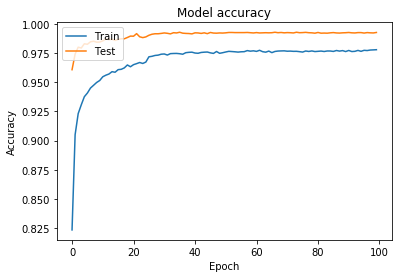

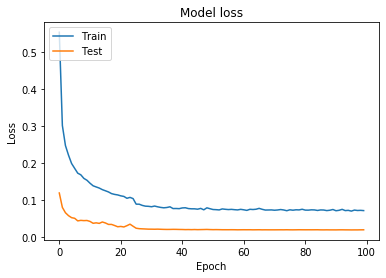

In [0]:
import matplotlib.pyplot as plt

# Evolución del accuracy de train y test
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Evolución del la funcion de perdida en train y test
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()